In [1]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample

# -----------------------------------
# STEP 1️⃣ - Load Dataset
# -----------------------------------
df = pd.read_csv("tweet_emotions.csv")  
df = df[['content', 'sentiment']].rename(columns={'content': 'text', 'sentiment': 'label'})

print("✅ Dataset loaded successfully!")
print(df.head())

✅ Dataset loaded successfully!
                                                text       label
0  @tiffanylue i know  i was listenin to bad habi...       empty
1  Layin n bed with a headache  ughhhh...waitin o...     sadness
2                Funeral ceremony...gloomy friday...     sadness
3               wants to hang out with friends SOON!  enthusiasm
4  @dannycastillo We want to trade with someone w...     neutral


In [ ]:
import re, string

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)     
    text = re.sub(r'\@\w+', '', text)                       
    text = re.sub(r'\#', '', text)                          
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)                         #
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report
)

# Sample data (replace with your actual cleaned dataset)
# df['text'] and df['emotion']
X = df['text']
y = df['emotion']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF Vectorizer with n-grams
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# --------------------------------------------------------
# 1️⃣ Model 1: Naive Bayes
# --------------------------------------------------------
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
acc_nb = accuracy_score(y_test, y_pred_nb)


In [6]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge -p data



jigsaw-toxic-comment-classification-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import zipfile, glob

for file in glob.glob("data/*.zip"):
    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall("data")
    print(f"✅ Unzipped: {file}")



✅ Unzipped: data\jigsaw-toxic-comment-classification-challenge.zip
✅ Unzipped: data\me-too-movement-tweets-dataset.zip
✅ Unzipped: data\sample_submission.csv.zip
✅ Unzipped: data\sentiment140.zip
✅ Unzipped: data\test.csv.zip
✅ Unzipped: data\test_labels.csv.zip
✅ Unzipped: data\train.csv.zip


In [6]:
import pandas as pd

# ✅ Use raw string or forward slashes to avoid path errors
sf_path = r"D:\BCA\aimlproject\tweet_emotions.csv"

# ✅ Load the dataset
df_sf = pd.read_csv(sf_path, encoding="latin-1")

print("✅ Emotion Detection dataset loaded successfully!")
print("Shape:", df_sf.shape)

# ✅ Display first few rows
df_sf.head()


✅ Emotion Detection dataset loaded successfully!
Shape: (40000, 3)


tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# ✅ Load Dataset
df = pd.read_csv(r"D:\BCA\aimlproject\tweet_emotions.csv")
print("✅ Dataset loaded successfully!")
print(df.head())

# ✅ Define features (input) and labels (output)
X = df['content']        # Text column
y = df['sentiment']      # Emotion label column

# ✅ Split Dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Data split complete!")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


✅ Dataset loaded successfully!
     tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...
✅ Data split complete!
Training samples: 32000
Testing samples: 8000


✅ Dataset loaded! Shape: (40000, 3)
     tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...
✅ Naive Bayes Accuracy: 0.3170
✅ Logistic Regression Accuracy: 0.3461


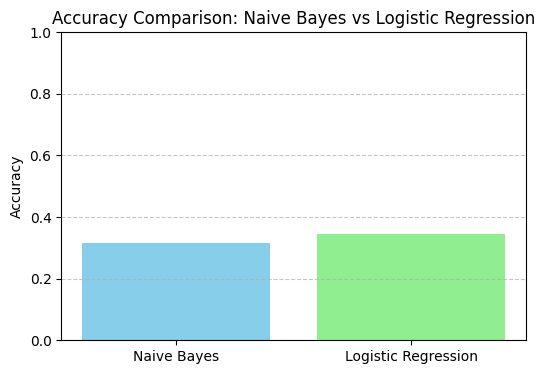

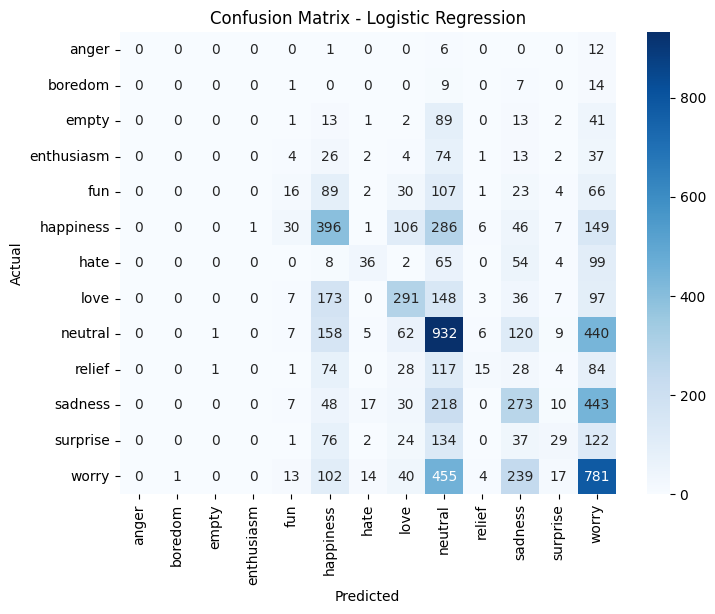


Classification Report:

              precision    recall  f1-score      support
anger          0.000000  0.000000  0.000000    19.000000
boredom        0.000000  0.000000  0.000000    31.000000
empty          0.000000  0.000000  0.000000   162.000000
enthusiasm     0.000000  0.000000  0.000000   163.000000
fun            0.181818  0.047337  0.075117   338.000000
happiness      0.340206  0.385214  0.361314  1028.000000
hate           0.450000  0.134328  0.206897   268.000000
love           0.470113  0.381890  0.421434   762.000000
neutral        0.353030  0.535632  0.425571  1740.000000
relief         0.416667  0.042614  0.077320   352.000000
sadness        0.307087  0.260994  0.282171  1046.000000
surprise       0.305263  0.068235  0.111538   425.000000
worry          0.327463  0.468788  0.385584  1666.000000
accuracy       0.346125  0.346125  0.346125     0.346125
macro avg      0.242434  0.178849  0.180534  8000.000000
weighted avg   0.330932  0.346125  0.315756  8000.000000


C:\Users\mukth\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mukth\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mukth\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [13]:
# -------------------------------
# 📘 Emotion Detection Evaluation
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ✅ Load Dataset
df = pd.read_csv(r"D:\BCA\aimlproject\tweet_emotions.csv")
print("✅ Dataset loaded! Shape:", df.shape)
print(df.head())

# ✅ Select columns
X = df['content']
y = df['sentiment']

# ✅ Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=15000, ngram_range=(1,3))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ✅ Train Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, C=2)
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"✅ {name} Accuracy: {acc:.4f}")

# -----------------------------------------------------
# 📊 1️⃣ Accuracy Comparison Bar Chart
# -----------------------------------------------------
plt.figure(figsize=(6, 4))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightgreen'])
plt.title("Accuracy Comparison: Naive Bayes vs Logistic Regression")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("accuracy_comparison.png", bbox_inches='tight', dpi=200)
plt.show()

# -----------------------------------------------------
# 📊 2️⃣ Confusion Matrix Heatmap (Logistic Regression)
# -----------------------------------------------------
best_model = models["Logistic Regression"]
y_pred_lr = best_model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred_lr, labels=best_model.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix.png", bbox_inches='tight', dpi=200)
plt.show()

# -----------------------------------------------------
# 📋 3️⃣ Classification Report Table
# -----------------------------------------------------
report = classification_report(y_test, y_pred_lr, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print("\nClassification Report:\n")
print(report_df)

# Save report as CSV for report inclusion
report_df.to_csv("classification_report.csv", index=True)


In [11]:
jigsaw_train = "data/train.csv"
df_jigsaw = pd.read_csv(jigsaw_train)

print("✅ Jigsaw dataset loaded!")
print("Shape:", df_jigsaw.shape)
df_jigsaw.head(5)


✅ Jigsaw dataset loaded!
Shape: (159571, 8)


id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

In [12]:
import re
import pandas as pd

def clean_tweet(text):
    text = str(text)
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)  # remove mentions
    text = re.sub(r"#", "", text)  # remove hashtag symbol
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    return text

# Example: clean a sample column
df_jigsaw['clean_comment_text'] = df_jigsaw['comment_text'].apply(clean_tweet)

# Preview
df_jigsaw[['comment_text', 'clean_comment_text']].head()


comment_text  \
0  Explanation\nWhy the edits made under my usern...   
1  D'aww! He matches this background colour I'm s...   
2  Hey man, I'm really not trying to edit war. It...   
3  "\nMore\nI can't make any real suggestions on ...   
4  You, sir, are my hero. Any chance you remember...   

                                  clean_comment_text  
0  explanation why the edits made under my userna...  
1  daww he matches this background colour im seem...  
2  hey man im really not trying to edit war its j...  
3  more i cant make any real suggestions on impro...  
4  you sir are my hero any chance you remember wh...

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create analyzer
analyzer = SentimentIntensityAnalyzer()

# Compute sentiment scores for each comment
df_jigsaw['vader_score'] = df_jigsaw['clean_comment_text'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Label each comment as positive, negative, or neutral
df_jigsaw['vader_sentiment'] = df_jigsaw['vader_score'].apply(
    lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral')
)

# Verify the new columns
df_jigsaw[['clean_comment_text', 'vader_score', 'vader_sentiment']].head()


clean_comment_text  vader_score  \
0  explanation why the edits made under my userna...       0.5574   
1  daww he matches this background colour im seem...       0.2263   
2  hey man im really not trying to edit war its j...      -0.1779   
3  more i cant make any real suggestions on impro...       0.2500   
4  you sir are my hero any chance you remember wh...       0.6808   

  vader_sentiment  
0        positive  
1        positive  
2        negative  
3        positive  
4        positive

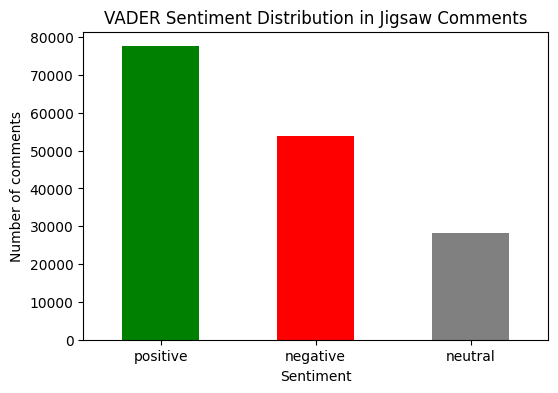

In [14]:
import matplotlib.pyplot as plt

# Count sentiment labels
sentiment_counts = df_jigsaw['vader_sentiment'].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['green','red','gray'])
plt.title("VADER Sentiment Distribution in Jigsaw Comments")
plt.ylabel("Number of comments")
plt.xlabel("Sentiment")
plt.xticks(rotation=0)
plt.show()


In [15]:
# Define toxicity columns
toxic_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Map Jigsaw toxicity to simple labels
# 1 → toxic (negative), 0 → non-toxic (neutral/positive)
df_jigsaw['toxicity_label'] = df_jigsaw[toxic_cols].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# Map VADER sentiment to match toxicity
# negative → 1 (toxic), neutral/positive → 0 (non-toxic)
df_jigsaw['vader_toxic_pred'] = df_jigsaw['vader_sentiment'].apply(lambda x: 1 if x == 'negative' else 0)

# Calculate accuracy
vader_accuracy = (df_jigsaw['toxicity_label'] == df_jigsaw['vader_toxic_pred']).mean()
print(f"✅ VADER Baseline Accuracy: {vader_accuracy*100:.2f}%")


✅ VADER Baseline Accuracy: 70.98%


In [16]:
#  Advanced sentiment analysis with DistilBERT

!pip install -q torch transformers scikit-learn tqdm



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:

# Step 4.2 — Imports
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from torch.optim import AdamW
from tqdm import tqdm


C:\Users\mukth\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:

# Step 4.3 — Load dataset
df = pd.read_csv("data/train.csv")

# Create a simple binary label: 1 if toxic, 0 if not
toxic_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df['label'] = (df[toxic_cols].sum(axis=1) > 0).astype(int)

# Keep only needed columns
df = df[['comment_text', 'label']]

# Take a small sample to train fast
df = df.sample(2000, random_state=42).reset_index(drop=True)

print("✅ Dataset loaded:", df.shape)
df.head()


✅ Dataset loaded: (2000, 2)


comment_text  label
0  Geez, are you forgetful!  We've already discus...      0
1  Carioca RFA \n\nThanks for your support on my ...      0
2  "\n\n Birthday \n\nNo worries, It's what I do ...      0
3  Pseudoscience category? \n\nI'm assuming that ...      0
4  (and if such phrase exists, it would be provid...      0

In [19]:

# Step 4.4 — Train/Validation Split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['comment_text'].tolist(),
    df['label'].tolist(),
    test_size=0.2,
    random_state=42
)

print("✅ Training samples:", len(train_texts))
print("✅ Validation samples:", len(val_texts))


✅ Training samples: 1600
✅ Validation samples: 400


In [20]:

# Step 4.5 — Tokenize Text
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=64)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=64)

print("✅ Tokenization complete!")


✅ Tokenization complete!


In [21]:
# Step 4.6 — Create Dataset Class
class JigsawDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

train_dataset = JigsawDataset(train_encodings, train_labels)
val_dataset = JigsawDataset(val_encodings, val_labels)


In [22]:

# Step 4.7 — Load DistilBERT Model
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=2
)
model.to(device)
print(f"✅ Model loaded on {device}")


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model loaded on cpu


In [23]:

# Step 4.8 — Create DataLoaders and Optimizer  till here rerun rq


from torch.utils.data import DataLoader
from torch.optim import AdamW

# 🔹 DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# 🔹 Optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

print("✅ DataLoaders and optimizer are ready!")


✅ DataLoaders and optimizer are ready!


In [24]:

# Step 4.9 — Training Loop
epochs = 1  # use 1 epoch for fast testing

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch+1}"):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    print(f"\n✅ Epoch {epoch+1} finished. Avg loss: {total_loss/len(train_loader):.4f}")


Training Epoch 1: 100%|██████████| 100/100 [04:42<00:00,  2.82s/it]


✅ Epoch 1 finished. Avg loss: 0.2163


In [25]:
#Step 4.10 — Quick Evaluation   from here u run next
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

print(f"\n✅ Validation Accuracy: {correct/total*100:.2f}%")



✅ Validation Accuracy: 95.75%


In [26]:
#Step 4.11 — Save the Model
save_dir = "distilbert_jigsaw_model"
import os
os.makedirs(save_dir, exist_ok=True)

model.save_pretrained(save_dir)
tokenizer.save_pretrained(save_dir)

print(f"✅ Model and tokenizer saved in '{save_dir}'")


✅ Model and tokenizer saved in 'distilbert_jigsaw_model'


In [27]:

#Step 5.1 — Reload the saved DistilBERT model and tokenizer

from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import torch

# Set device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Reload tokenizer and model
save_dir = "distilbert_jigsaw_model"
tokenizer = DistilBertTokenizerFast.from_pretrained(save_dir)
model = DistilBertForSequenceClassification.from_pretrained(save_dir)
model.to(device)

print(f"✅ Model and tokenizer reloaded on {device}")


✅ Model and tokenizer reloaded on cpu


In [28]:

# Step 5.2 — Prepare validation data for predictions
# Tokenize the validation text
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=64, return_tensors="pt")

# Move tensors to device
input_ids = val_encodings['input_ids'].to(device)
attention_mask = val_encodings['attention_mask'].to(device)


In [29]:
# Step 5.3 — Make predictions with DistilBERT
model.eval()
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()  # predicted labels

print("✅ Predictions done!")


✅ Predictions done!


In [30]:
#Step 5.4 — Compare DistilBERT predictions with VADER sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Get VADER predictions for validation set
vader_preds = []
for text in val_texts:
    score = analyzer.polarity_scores(text)['compound']
    if score > 0.05:
        vader_preds.append(1)  # positive/toxic
    else:
        vader_preds.append(0)  # neutral/not toxic

print("✅ VADER predictions done!")


✅ VADER predictions done!


DistilBERT Accuracy: 95.75%
VADER Accuracy: 46.75%


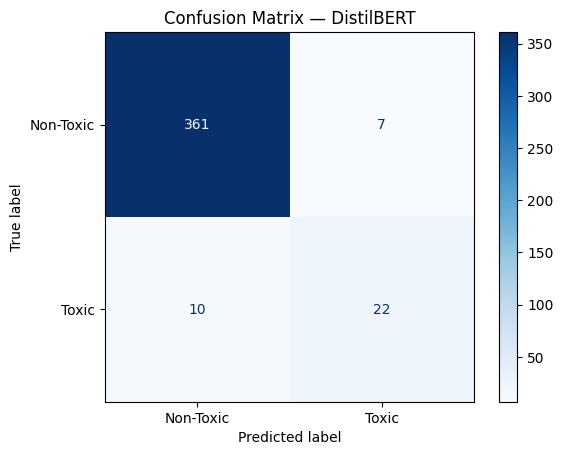

In [31]:
#Step 5.5 — Evaluate and visualize
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# DistilBERT accuracy
bert_acc = accuracy_score(val_labels, preds)
print(f"DistilBERT Accuracy: {bert_acc*100:.2f}%")

# VADER accuracy
vader_acc = accuracy_score(val_labels, vader_preds)
print(f"VADER Accuracy: {vader_acc*100:.2f}%")

# Confusion matrix for DistilBERT
cm = confusion_matrix(val_labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Toxic", "Toxic"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix — DistilBERT")
plt.show()


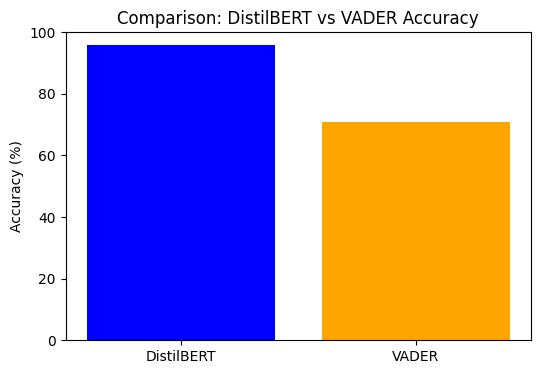

In [32]:
#Step 6.1 — Accuracy Comparison Plot Example

import matplotlib.pyplot as plt

# Updated accuracies
methods = ['DistilBERT', 'VADER']
accuracies = [bert_acc*100, 70.98]  # DistilBERT already computed, VADER = 70.98%

plt.figure(figsize=(6,4))
plt.bar(methods, accuracies, color=['blue','orange'])
plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")
plt.title("Comparison: DistilBERT vs VADER Accuracy")
plt.show()

